### [22.05.09] clustering 재 진행
* 행정동 별 입지특성 (Feature: 토지피복비율)

In [3]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 행정동별 토지 면적 데이터
dong_landarea = pd.read_csv("../../resources/processedData/입지특성_행정동별_토지피복_면적.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 토지 피복 비율 데이터 Load
dong_landscape = pd.read_csv("../../resources/processedData/입지특성_행정동별 feature.csv", encoding="utf8")

In [4]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong = pd.DataFrame(dong_list, columns=["행정동"])

# 매장 이름 추출
store_list = list(store_dong["매장명"])

In [5]:
dong_landscape

,행정동,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율
0,개포1동,16,0,3,0.424773,0.034857,0.540370
1,개포2동,31,20,24,0.178740,0.174853,0.646407
2,개포4동,33,0,23,0.441235,0.037082,0.521683
3,논현1동,22,14,36,0.489673,0.014120,0.496207
4,논현2동,22,16,32,0.575432,0.012579,0.411990
5,대치1동,19,10,19,0.266545,0.129195,0.604261
6,대치2동,30,9,25,0.508280,0.052936,0.438784
7,대치4동,16,6,37,0.511551,0.002936,0.485514
8,도곡1동,26,8,15,0.474004,0.023388,0.502608
9,도곡2동,18,6,8,0.506491,0.058701,0.434808


In [6]:
## feature 뽑기
# dong feature 뽑기
dong_feature = pd.merge(people[["행정동","인구수","유동인구비율"]], dong_landscape, on = "행정동", how = "left")
dong_feature = pd.merge(dong_feature, dong_landarea, on = "행정동")
dong_feature = pd.merge(dong, dong_feature, on="행정동")
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,주거지역 면적,상업지역 면적,문화체육휴양시설 면적
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,287745.52820,346214.03670,30153.214620
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,124381.11090,49293.15805,28456.060330
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,227352.24110,215557.99160,14540.671670
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,466494.11650,755482.97330,13085.768710
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,150961.25180,246375.56610,36370.444870
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,67126.65317,45075.68818,19633.422240
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,333385.99470,148537.38280,42961.850090
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,236823.31330,202768.24310,11110.945070
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,164010.41420,318868.56510,12238.446040
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,187320.82250,197366.55050,1132.595012


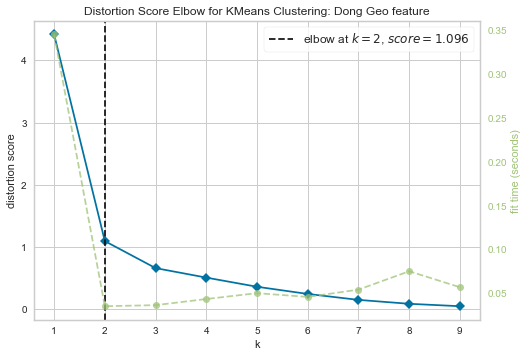

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Geo feature'}, xlabel='k', ylabel='distortion score'>

In [7]:
## 행정동 geofeature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
# ["유동인구비율","버스정류장 개수", "지하철역 개수", "경쟁점 개수", "상업지역 비율",	"문화체육휴양시설 비율", "주거지역 비율", "주거지역 면적",	"상업지역 면적", "문화체육휴양시설 면적"]
dong_geofeature_data = dong_feature[["상업지역 비율",	"문화체육휴양시설 비율", "주거지역 비율"]].values

dong_geofeature_data = MinMaxScaler().fit_transform(dong_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans(random_state=10)
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geo feature")
visualizer.fit(dong_geofeature_data)
visualizer.show()

In [8]:
## 0. 모든 feature 넣고 clustering 진행 결과
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_data)

# 결과 저장
dong_feature["dong_cluster_geo"] = model.fit_predict(dong_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_geo"]))


print(dong_feature[dong_feature["dong_cluster_geo"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_geo"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_geo"] == 2]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 3]["행정동"].values)

Counter({0: 10, 1: 5})
['청담동' '역삼2동' '역삼1동' '신사동' '삼성2동' '삼성1동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
[]


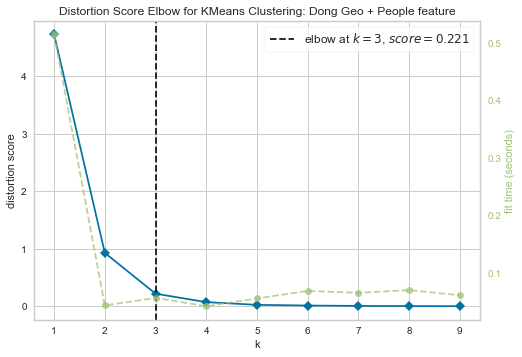

Counter({0: 8, 1: 5, 2: 2})
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


In [9]:
## 행정동 geofeature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
# ["유동인구비율","버스정류장 개수", "지하철역 개수", "경쟁점 개수", "상업지역 비율",	"문화체육휴양시설 비율", "주거지역 비율", "주거지역 면적",	"상업지역 면적", "문화체육휴양시설 면적"]
dong_geofeature_whole = dong_feature[["유동인구비율", "dong_cluster_geo"]].values

dong_geofeature_whole = MinMaxScaler().fit_transform(dong_geofeature_whole) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geo + People feature")
visualizer.fit(dong_geofeature_whole)
visualizer.show()

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_whole)

# 결과 저장
dong_feature["dong_cluster_whole"] = model.fit_predict(dong_geofeature_whole)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_whole"]))


print(dong_feature[dong_feature["dong_cluster_whole"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 2]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 3]["행정동"].values)

In [10]:
store_dong

,매장코드,매장명,도로명주소,위도,경도,행정동
0,S24088,깐부치킨(청담자이점),서울특별시 강남구 영동대로138길 9 (청담동1층 105호),37.522861,127.056465,청담동
1,T06644,(주)깐부 청담본점,서울특별시 강남구 선릉로 760 지상2층 (청담동),37.522568,127.039578,청담동
2,S56417,깐부치킨(일원점),서울특별시 강남구 일원로9길 6 1층 (일원동),37.489289,127.081985,일원1동
3,T18671,깐부치킨(역삼디오빌점),서울특별시 강남구 언주로85길 7 1층 102호 (역삼동),37.500968,127.042636,역삼2동
4,S48814,깐부치킨(강남세브란스점),서울특별시 강남구 언주로65길 13 (역삼동 삼남빌딩 지상1층 101호 102호),37.495044,127.044869,역삼2동
5,U06529,깐부치킨(역삼초교점),서울특별시 강남구 역삼로4길 16 (역삼동지상1층113호),37.492350,127.031997,역삼1동
6,S95349,깐부치킨(역삼GS타워점),서울특별시 강남구 논현로94길 15 지상1층 (역삼동),37.502631,127.037547,역삼1동
7,T53532,깐부치킨 역삼본점,서울특별시 강남구 논현로85길 37 지상1층 (역삼동),37.498137,127.035094,역삼1동
8,S24004,깐부치킨(역삼럭키점),서울특별시 강남구 논현로63길 25 (역삼동),37.492247,127.038872,역삼1동
9,S37219,깐부치킨(강남역플래티넘점),서울특별시 강남구 강남대로78길 14 (역삼동),37.494866,127.030536,역삼1동


In [11]:
# store table 생성
store = pd.merge(store_dong[["매장코드", "매장명", "행정동"]],dong_feature[["행정동","인구수","dong_cluster_geo","dong_cluster_whole"]], on = "행정동", how="right")
store["인구당매출"] = 0

for st in store_list:
    idx = store[store["매장명"] == st].index
    sale = round(sales[sales["매장명"] == st]["총판매금액"].sum() / store[store["매장명"]==st]["인구수"].values[0], 3)
    store.iloc[idx,-1] = sale

In [12]:
store

,매장코드,매장명,행정동,인구수,dong_cluster_geo,dong_cluster_whole,인구당매출
0,S24088,깐부치킨(청담자이점),청담동,30014,0,0,1575.615
1,T06644,(주)깐부 청담본점,청담동,30014,0,0,2662.957
2,S56417,깐부치킨(일원점),일원1동,16806,1,1,1868.511
3,T18671,깐부치킨(역삼디오빌점),역삼2동,36560,0,0,1002.229
4,S48814,깐부치킨(강남세브란스점),역삼2동,36560,0,0,402.694
5,U06529,깐부치킨(역삼초교점),역삼1동,35878,0,2,399.284
6,S95349,깐부치킨(역삼GS타워점),역삼1동,35878,0,2,1402.823
7,T53532,깐부치킨 역삼본점,역삼1동,35878,0,2,1130.038
8,S24004,깐부치킨(역삼럭키점),역삼1동,35878,0,2,422.320
9,S37219,깐부치킨(강남역플래티넘점),역삼1동,35878,0,2,1544.066


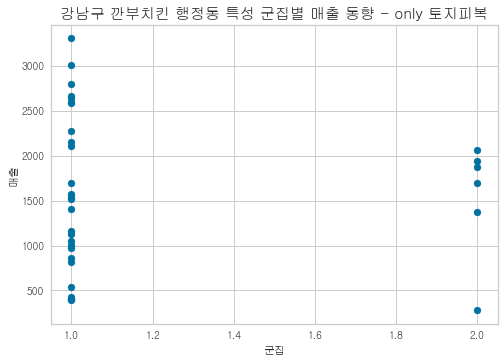

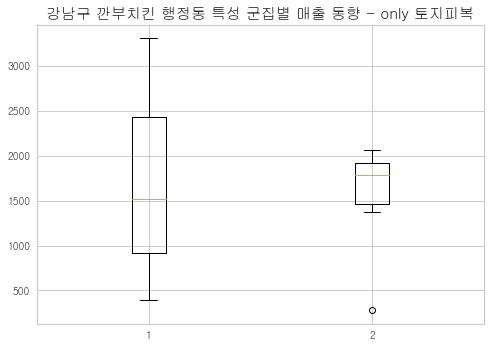

Text(0, 0.5, '인구당 매출')

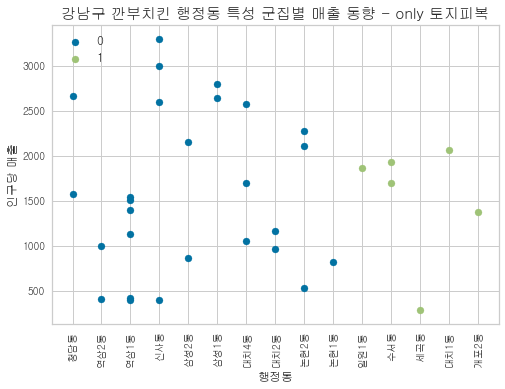

In [13]:
## 결과 Plot - 행정동별 feature 매출 동향
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 산점도
plt.scatter(store["dong_cluster_geo"]+1, store["인구당매출"])
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - only 토지피복', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store[store["dong_cluster_geo"] == 0]["인구당매출"].to_list()
c2 = store[store["dong_cluster_geo"] == 1]["인구당매출"].to_list()

value = [c1, c2]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - only 토지피복', fontsize=15)
plt.show()

groups = store.groupby('dong_cluster_geo')

fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group["행정동"], 
            group["인구당매출"], 
            marker='o', 
            label=name)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - only 토지피복', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('행정동', fontsize=12)
plt.ylabel('인구당 매출', fontsize=12)

In [70]:
store

,매장코드,매장명,행정동,인구수,dong_cluster_geo,dong_cluster_whole,인구당매출
0,S24088,깐부치킨(청담자이점),청담동,30014,0,0,1575.615
1,T06644,(주)깐부 청담본점,청담동,30014,0,0,2662.957
2,S56417,깐부치킨(일원점),일원1동,16806,1,1,1868.511
3,T18671,깐부치킨(역삼디오빌점),역삼2동,36560,0,0,1002.229
4,S48814,깐부치킨(강남세브란스점),역삼2동,36560,0,0,402.694
5,U06529,깐부치킨(역삼초교점),역삼1동,35878,0,2,399.284
6,S95349,깐부치킨(역삼GS타워점),역삼1동,35878,0,2,1402.823
7,T53532,깐부치킨 역삼본점,역삼1동,35878,0,2,1130.038
8,S24004,깐부치킨(역삼럭키점),역삼1동,35878,0,2,422.320
9,S37219,깐부치킨(강남역플래티넘점),역삼1동,35878,0,2,1544.066


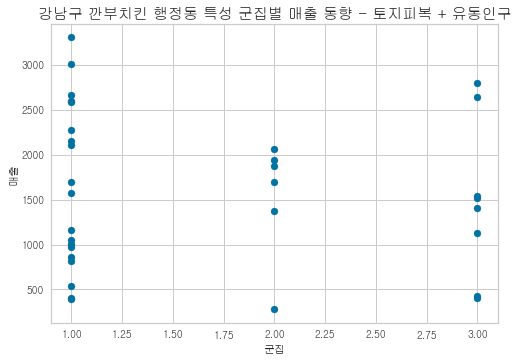

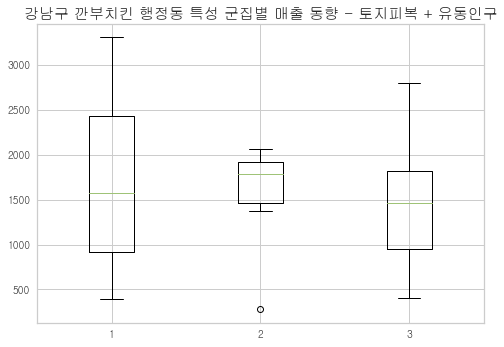

Text(0, 0.5, '인구당 매출')

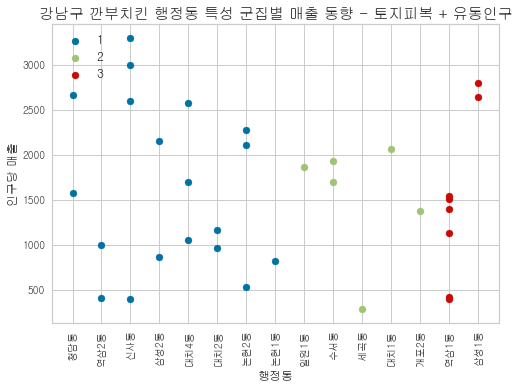

In [14]:
## 결과 Plot - 행정동별 feature 매출 동향
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 산점도
plt.scatter(store["dong_cluster_whole"]+1, store["인구당매출"])
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store[store["dong_cluster_whole"] == 0]["인구당매출"].to_list()
c2 = store[store["dong_cluster_whole"] == 1]["인구당매출"].to_list()
c3 = store[store["dong_cluster_whole"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구', fontsize=15)
plt.show()

groups = store.groupby('dong_cluster_whole')

fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group["행정동"], 
            group["인구당매출"], 
            marker='o', 
            label=name+1)
ax.legend(fontsize=12, loc='upper left') # legend position
plt.title('강남구 깐부치킨 행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('행정동', fontsize=12)
plt.ylabel('인구당 매출', fontsize=12)

In [15]:
store

,매장코드,매장명,행정동,인구수,dong_cluster_geo,dong_cluster_whole,인구당매출
0,S24088,깐부치킨(청담자이점),청담동,30014,0,0,1575.615
1,T06644,(주)깐부 청담본점,청담동,30014,0,0,2662.957
2,S56417,깐부치킨(일원점),일원1동,16806,1,1,1868.511
3,T18671,깐부치킨(역삼디오빌점),역삼2동,36560,0,0,1002.229
4,S48814,깐부치킨(강남세브란스점),역삼2동,36560,0,0,402.694
5,U06529,깐부치킨(역삼초교점),역삼1동,35878,0,2,399.284
6,S95349,깐부치킨(역삼GS타워점),역삼1동,35878,0,2,1402.823
7,T53532,깐부치킨 역삼본점,역삼1동,35878,0,2,1130.038
8,S24004,깐부치킨(역삼럭키점),역삼1동,35878,0,2,422.320
9,S37219,깐부치킨(강남역플래티넘점),역삼1동,35878,0,2,1544.066


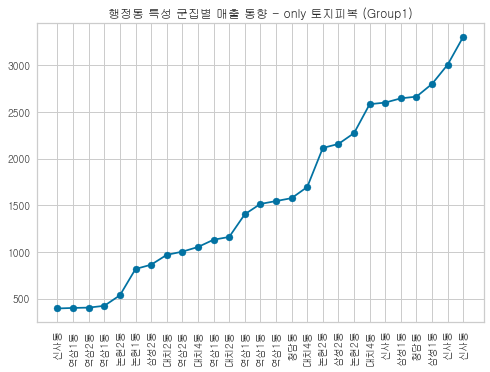

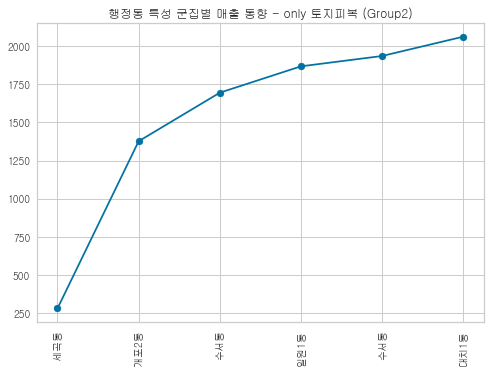

In [67]:
# dong_cluster_geo 시각화
group0 = store[store["dong_cluster_geo"] == 0][["행정동","인구당매출"]]
group0 = group0.values.tolist()
group0.sort(key= lambda x:x[1])
x = pd.DataFrame(group0)[0].to_list()
y = pd.DataFrame(group0)[1].to_list()
plt.plot(list(range(len(x))),y)
plt.scatter(list(range(len(x))),y)
plt.title("행정동 특성 군집별 매출 동향 - only 토지피복 (Group1)")
plt.xticks(list(range(27)), labels = x, rotation = 90)
plt.show()

group1 = store[store["dong_cluster_geo"] == 1][["행정동","인구당매출"]]
group1 = group1.values.tolist()
group1.sort(key= lambda x:x[1])
x = pd.DataFrame(group1)[0].to_list()
y = pd.DataFrame(group1)[1].to_list()
plt.plot(list(range(len(x))),y)
plt.scatter(list(range(len(x))),y)
plt.title("행정동 특성 군집별 매출 동향 - only 토지피복 (Group2)")
plt.xticks(list(range(len(x))), labels = x, rotation = 90)
plt.show()

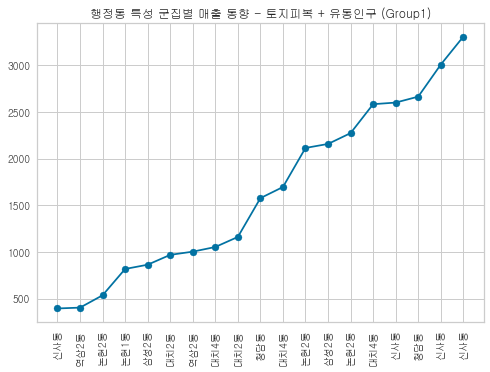

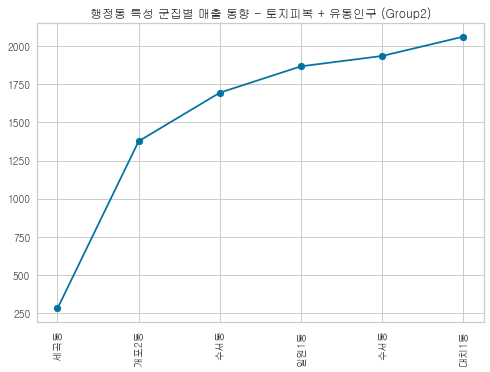

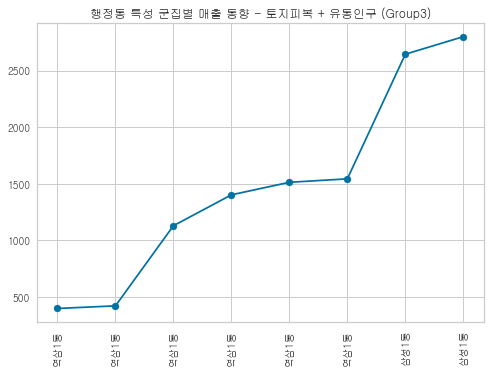

In [69]:
# dong_cluster_geo 시각화
group0 = store[store["dong_cluster_whole"] == 0][["행정동","인구당매출"]]
group0 = group0.values.tolist()
group0.sort(key= lambda x:x[1])
x = pd.DataFrame(group0)[0].to_list()
y = pd.DataFrame(group0)[1].to_list()
plt.plot(list(range(len(x))),y)
plt.scatter(list(range(len(x))),y)
plt.title("행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구 (Group1)")
plt.xticks(list(range(len(x))), labels = x, rotation = 90)
plt.show()

group1 = store[store["dong_cluster_whole"] == 1][["행정동","인구당매출"]]
group1 = group1.values.tolist()
group1.sort(key= lambda x:x[1])
x = pd.DataFrame(group1)[0].to_list()
y = pd.DataFrame(group1)[1].to_list()
plt.plot(list(range(len(x))),y)
plt.scatter(list(range(len(x))),y)
plt.title("행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구 (Group2)")
plt.xticks(list(range(len(x))), labels = x, rotation = 90)
plt.show()

group2 = store[store["dong_cluster_whole"] == 2][["행정동","인구당매출"]]
group2 = group2.values.tolist()
group2.sort(key= lambda x:x[1])
x = pd.DataFrame(group2)[0].to_list()
y = pd.DataFrame(group2)[1].to_list()
plt.plot(list(range(len(x))),y)
plt.scatter(list(range(len(x))),y)
plt.title("행정동 특성 군집별 매출 동향 - 토지피복 + 유동인구 (Group3)")
plt.xticks(list(range(len(x))), labels = x, rotation = 90)
plt.show()

In [71]:
dong_feature

,행정동,인구수,유동인구비율,버스정류장 개수,지하철역 개수,경쟁점 개수,상업지역 비율,문화체육휴양시설 비율,주거지역 비율,주거지역 면적,상업지역 면적,문화체육휴양시설 면적,dong_cluster_geo,dong_cluster_whole
0,청담동,30014,1.42,23,11,21,0.521318,0.045404,0.433278,287745.52820,346214.03670,30153.214620,0,0
1,일원1동,16806,1.11,16,2,19,0.243868,0.140781,0.615351,124381.11090,49293.15805,28456.060330,1,1
2,역삼2동,36560,1.36,27,7,24,0.471216,0.031786,0.496998,227352.24110,215557.99160,14540.671670,0,0
3,역삼1동,35878,3.02,49,33,83,0.611696,0.010595,0.377709,466494.11650,755482.97330,13085.768710,0,2
4,신사동,17541,2.14,12,6,18,0.568069,0.083859,0.348072,150961.25180,246375.56610,36370.444870,0,0
5,수서동,16202,1.54,17,14,10,0.341908,0.148923,0.509169,67126.65317,45075.68818,19633.422240,1,1
6,세곡동,45160,0.94,66,0,30,0.282990,0.081850,0.635160,333385.99470,148537.38280,42961.850090,1,1
7,삼성2동,30291,1.29,24,17,30,0.449894,0.024653,0.525454,236823.31330,202768.24310,11110.945070,0,0
8,삼성1동,14811,3.02,30,20,21,0.644026,0.024718,0.331256,164010.41420,318868.56510,12238.446040,0,2
9,대치4동,20773,1.62,16,6,37,0.511551,0.002936,0.485514,187320.82250,197366.55050,1132.595012,0,0


In [ ]:
## 행정동 geofeature 넣고 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
# ["유동인구비율","버스정류장 개수", "지하철역 개수", "경쟁점 개수", "상업지역 비율",	"문화체육휴양시설 비율", "주거지역 비율", "주거지역 면적",	"상업지역 면적", "문화체육휴양시설 면적"]
dong_geofeature_whole = dong_feature[["유동인구비율", "dong_cluster_geo"]].values

dong_geofeature_whole = MinMaxScaler().fit_transform(dong_geofeature_whole) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geo + People feature")
visualizer.fit(dong_geofeature_whole)
visualizer.show()

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_whole)

# 결과 저장
dong_feature["dong_cluster_whole"] = model.fit_predict(dong_geofeature_whole)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_whole"]))


print(dong_feature[dong_feature["dong_cluster_whole"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_whole"] == 2]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 3]["행정동"].values)